In [5]:
# < 2장 : 1차원 데이터 정리 >

In [31]:
# [ 데이터 준비하기 ]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%precision %.3f    # 출력을 소수점 이하 3자리로 제한
pd.set_option('display.precision', 3)   # DataFrame의 출력을 소수점 이하 3자리로 제한

In [7]:
df = pd.read_csv('DATA/python_stat_sample-master/data/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [8]:
scores = np.array(df['english'])[:10]    # 수치계산 위한 다차원 배열
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [9]:
score_DF = pd.DataFrame({'score':scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
score_DF

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [10]:
# [ 2.1 데이터 중심의 지표 ]
sum(scores) / len(scores)   # 평균

55.000    # 출력을 소수점 이하 3자리로 제한

In [11]:
np.mean(scores) # 평균 함수

55.000    # 출력을 소수점 이하 3자리로 제한

In [12]:
score_DF.mean()     # DF의 평균

score    55.0
dtype: float64

In [13]:
sorted_scores = np.sort(scores)     # 오름차순 정렬
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [14]:
n = len(sorted_scores)
if n %2:
    median = sorted_scores[(n+1)//2 -1]
else:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
median  # 중앙값의 정의

56.500    # 출력을 소수점 이하 3자리로 제한

In [15]:
np.median(scores)   # 동일한 넘파이 함수

56.500    # 출력을 소수점 이하 3자리로 제한

In [16]:
score_DF.median()   # DF의 중앙값

score    56.5
dtype: float64

In [17]:
# 최빈값   .mode()
pd.Series([1,1,1,2,2,3]).mode() # 1

0    1
dtype: int64

In [18]:
 # 2.2
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [19]:
another_scores = [50, 60, 58, 54, 51, 56,57, 53,52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [20]:
np.mean(another_deviation)
np.mean(deviation)  # 둘 다 0

0.000    # 출력을 소수점 이하 3자리로 제한

In [21]:
summary_df = score_DF.copy()
summary_df['deviation']= deviation
summary_df  # 새 열로 정리

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [22]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [23]:
#

In [25]:
# 2.4 1차월 데이터 시각화
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [31]:
# 함수에서 가져오기
freq, _ = np.histogram(english_scores, bins = 10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [36]:
# 0~10, 10~20 ... 이라는 문자열 리스트
freq_class = [f'{i}~{i+10}'for i in range(0,100,10)]

# freq_class 를 인덱스로 DF 작성
freq_dist_df = pd.DataFrame({'frequency':freq}, index = pd.Index(freq_class, name = 'class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [55]:
# class value
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [56]:
# 상대도수
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [57]:
# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [58]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,relative frequency,cumulative relative frequency,class value
class,,,,
0~10,0,0.00,0.00,5
10~20,0,0.00,0.00,15
20~30,0,0.00,0.00,25
30~40,2,0.04,0.04,35
40~50,8,0.16,0.20,45
50~60,16,0.32,0.52,55
60~70,18,0.36,0.88,65
70~80,6,0.12,1.00,75
80~90,0,0.00,1.00,85


In [59]:
# 최빈값 검토
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

In [60]:
# 히스토그램
import matplotlib.pyplot as plt
%matplotlib inline

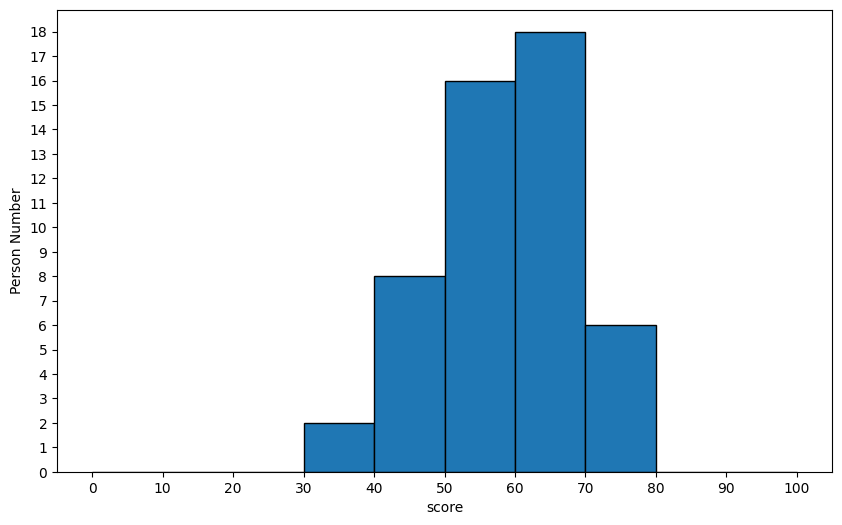

In [61]:
# 히스토그램 그리기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)   # 그래프 영역 지정(1x1에 1개)

freq, _, _ = ax.hist(english_scores, bins = 10, range=(0,100), edgecolor = 'black')


ax.set_xlabel('score')
ax.set_ylabel('Person Number')
ax.set_xticks(np.linspace(0,100,10+1)) 
# 10+1 인 이유 :
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

In [1]:
# 상자그림

In [16]:
# 2차원 데이터 정리
df = pd.read_csv('DATA/python_stat_sample-master/data/ch2_scores_em.csv', index_col = 'student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

score_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores}, index = pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='student'))
score_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### [ Day2 : 2월 19일 ]  
새로운 파일을 주셨는데 점심 넘어서까지 1장 중

In [20]:
# 1. 두 데이터 사이의 관계를 나타내는 지표
# -> 음, 양의 상관관계

# 2. 공분산
# - 2차원 그래프로 편차를 표현
summary_df = score_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations']= summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [21]:
summary_df['product of deviations'].mean()

62.800    # 출력을 소수점 이하 3자리로 제한

In [22]:
# 2-2. 함수 하나로 만들기,,
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat     # 1행 2열, 2행 1열이 영어 수학의 공분산

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [25]:
# 3. 상관계수
# - 공분산을 -1 ~ 0 ~ 1 로 표현
print('상관계수:')
np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

상관계수:


0.819    # 출력을 소수점 이하 3자리로 제한

In [26]:
# 3-2. 함수 하나로 만들기,,
# .corrcoef : 상관계수 표현
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [27]:
# 3-3. DF에서 .corr
score_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


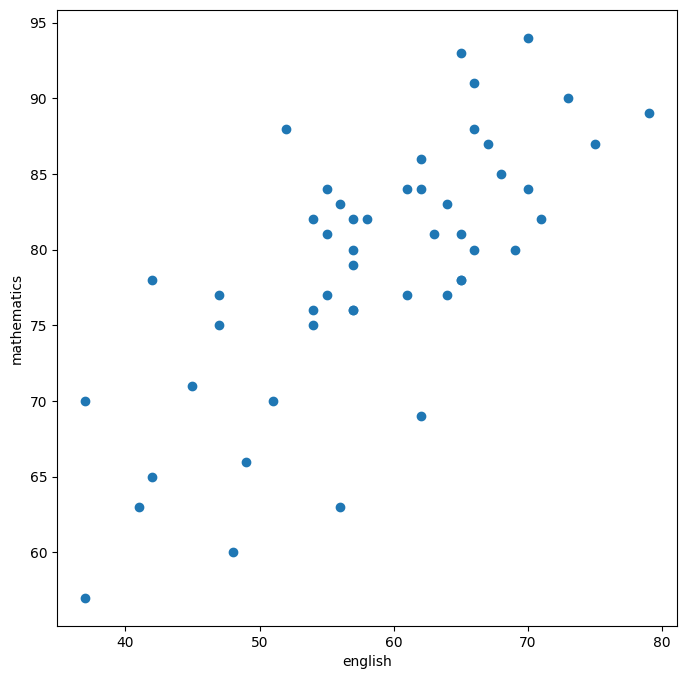

In [36]:
# 4. 산점도
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()

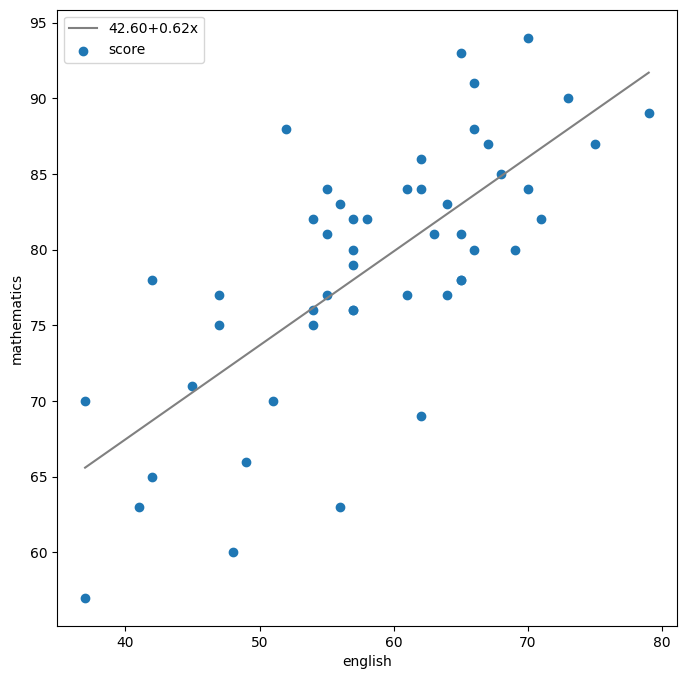

In [38]:
# 5. 회귀직선
# - 회귀선이 있다는 것만 알고
# - 함수 사용법만 알면 된다(이론적 증명까진 무리)

# [ y = B0 + B1*x ]
# 1) .polyfit : B0, B1 (계수) 구하기
# : np.ployfit( x, y, degree )
poly_fit = np.polyfit(english_scores, math_scores, 1)
# 2) .poly1d : 회귀직선 반환 함수
poly_1d = np.poly1d(poly_fit)
# 3) .linspace : 직선의 x좌표
xs = np.linspace(english_scores.min(), english_scores.max())
# 4) y좌표
ys = poly_1d(xs)

# 5) .plot : 직선 그리기
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(english_scores, math_scores, label='score')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
# 범례 표시
ax.legend(loc='upper left')
plt.show()

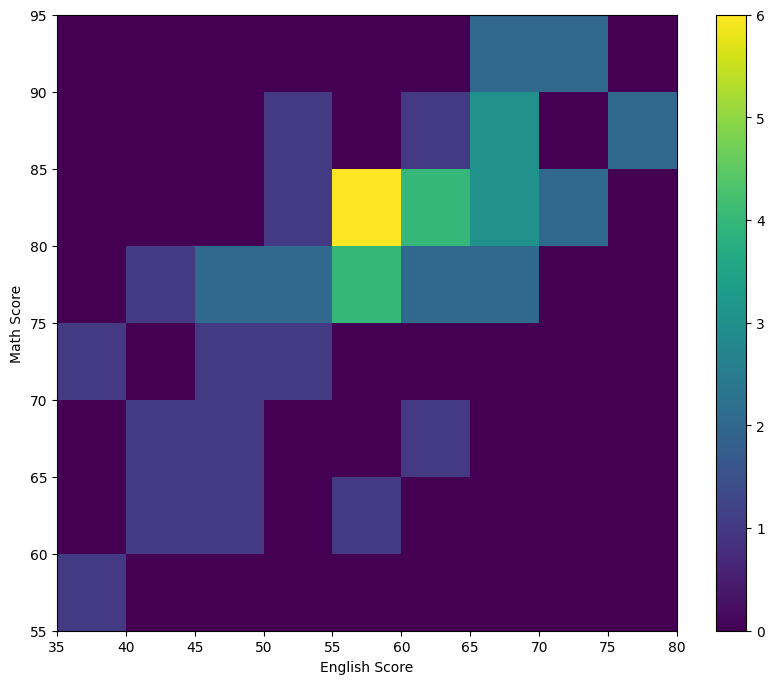

In [32]:
# 6. 히트맵
# - 히스토그램의 2차원 버젼
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins = [9,8], range = [(35, 80),(55,95)])
# bins=[ ] : 히스토그램의 격자 수; 2차원이니깐
ax.set_xlabel('English Score')
ax.set_ylabel('Math Score')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
plt.colorbar(c[3], ax=ax)
plt.show()

In [39]:
# 7. 앤스컴의 예
# - 다 다른 의미의 값이지만 같은 회귀선을 가진다
# - 따라서 회귀선에 속으면 안된다

### [ 2장 이산형 확률분포 ]  
교재 4장 : 추측통계의 기본
1) 모집단과 표본
2) 확률 모형
3) 추측통계의 확률

In [40]:
# 0. 첫 페이지 : 변수 표현
# - np. 의 표현, str과 int 차이 등등

In [ ]:
# 1. 추측 통계
# - 일부 데이터로 전체의 통계적 성질을 추측
# - 전체를 알 수 없을 때
